## "Repeated emoji" refers to instance where the same emoji is used multiple times consecutively within a coment. For example, 😀😀😀. This do not count: 😀🥲😀.

In [1]:
import pandas as pd
from langdetect import detect
import matplotlib.pyplot as plt
import emoji
import seaborn as sns
import warnings
import numpy as np

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Data/cleaned_by_language.csv")

In [4]:
en_df = df[df['language'] == 'en']
es_df = df[df['language'] == 'es']

## Maximum Repetition Count of Each Emoji: the highest number of times a specific emoji  is repeated within a comment

In [5]:
def get_repetition_count(lang_df):
    repetition = {}
    repetition_list = lang_df['emoji repetition list'].tolist()
    new_repetition_list = []
    
    for i in repetition_list:
        if i != '[]':
            new_repetition_list.append(i[2:-2].split("', '"))
    
    tnew_repetition_list = []
    for i in new_repetition_list:
        tnew_repetition_list += i
    
    for ele in tnew_repetition_list:
        repetition[ele] = repetition.setdefault(ele, 0) + 1
        
    emoji_repetition_arr = []
    for key, value in repetition.items():
        emoji_repetition_arr.append([key, value])
        
    emoji_repetition_df = pd.DataFrame(emoji_repetition_arr, columns=['emoji repetition','count'])
    emoji_repetition_df = emoji_repetition_df.sort_values(by='count', ascending = False)
    
    return emoji_repetition_df

In [6]:
en_df_repetition_count = get_repetition_count(en_df)
es_df_repetition_count = get_repetition_count(es_df)

In [7]:
def get_emoji(df):
    return df['emoji repetition'][0]
en_df_repetition_count['emoji'] = en_df_repetition_count.apply(get_emoji, axis=1)
es_df_repetition_count['emoji'] = es_df_repetition_count.apply(get_emoji, axis=1)

def get_repetition(df):
    return len(df['emoji repetition'])
en_df_repetition_count['repetition'] = en_df_repetition_count.apply(get_repetition, axis=1)
es_df_repetition_count['repetition'] = es_df_repetition_count.apply(get_repetition, axis=1)

In [8]:
es_max_emoji_repetition = es_df_repetition_count.groupby('emoji')['repetition'].max()
es_max_emoji_repetition = es_max_emoji_repetition.drop('\\')

en_max_emoji_repetition = en_df_repetition_count.groupby('emoji')['repetition'].max()
en_max_emoji_repetition = en_max_emoji_repetition.drop('\\')

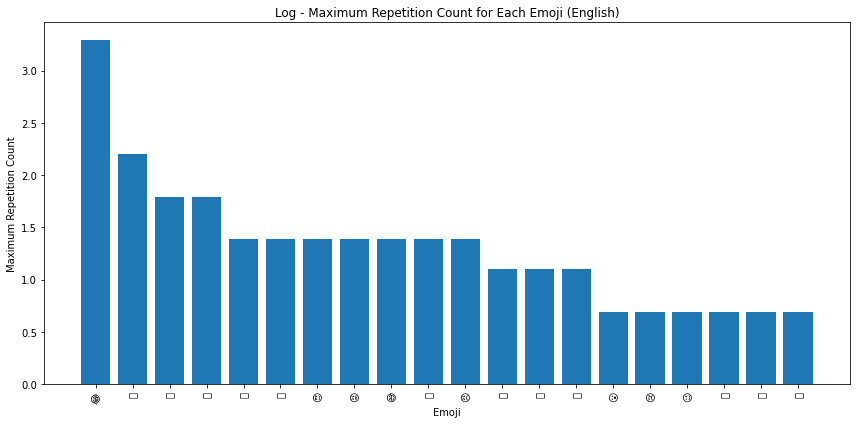

Index(['😂', '🤣', '🙄', '🔥', '🙌', '👎', '😍', '😡', '😅', '👏', '😠', '🙏', '🥱', '💯',
       '😮', '😢', '😉', '💀', '🥰', '🌹'],
      dtype='object', name='emoji')

In [10]:
en_max_emoji_repetition = en_max_emoji_repetition.sort_values(ascending=False)
en_emojis = en_max_emoji_repetition.index
en_max_repetition = en_max_emoji_repetition.values
log_en_max_repetition = np.log(en_max_repetition)

plt.figure(figsize=(12, 6))
plt.bar(en_emojis, log_en_max_repetition)
plt.xlabel('Emoji')
# plt.yscale('log')
plt.ylabel('Maximum Repetition Count')
plt.title('Log - Maximum Repetition Count for Each Emoji (English)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
en_emojis

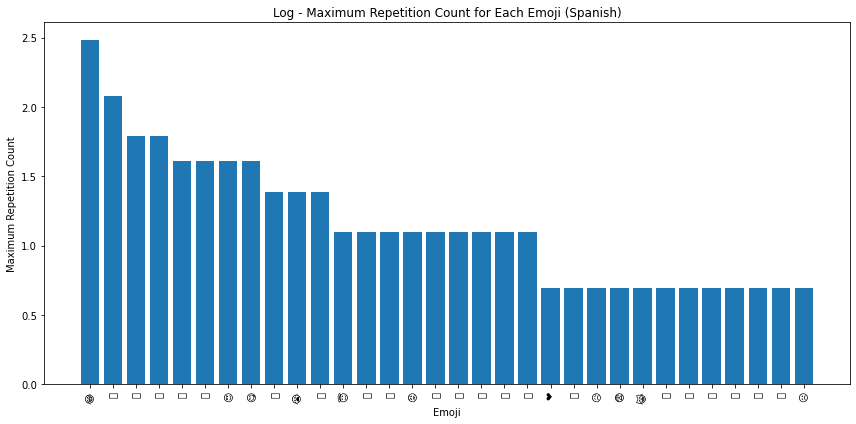

Index(['😂', '🙌', '👏', '🔥', '🙏', '💚', '😍', '😋', '🥳', '😭', '💰', '😇', '🤬', '🤔',
       '😡', '🥺', '💜', '💙', '💔', '💀', '❤', '💪', '😥', '😨', '😹', '👎', '👋', '🤣',
       '🤩', '🐐', '⭐', '☹'],
      dtype='object', name='emoji')

In [11]:
es_max_emoji_repetition = es_max_emoji_repetition.sort_values(ascending=False)
es_emojis = es_max_emoji_repetition.index
es_max_repetition = es_max_emoji_repetition.values
log_es_max_repetition = np.log(es_max_repetition)

plt.figure(figsize=(12, 6))
plt.bar(es_emojis, log_es_max_repetition)
plt.xlabel('Emoji')
# plt.yscale('log')
plt.ylabel('Maximum Repetition Count')
plt.title('Log - Maximum Repetition Count for Each Emoji (Spanish)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
es_emojis

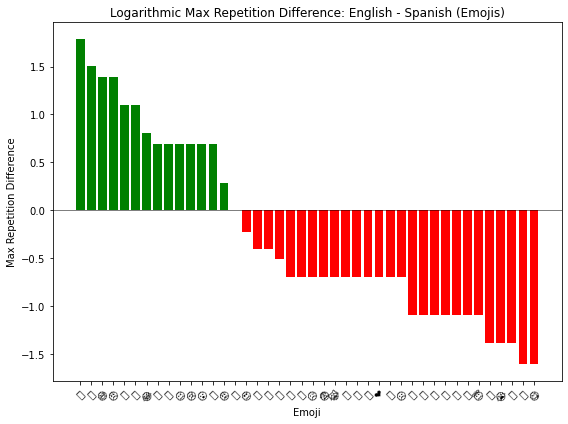

2     🙄
1     🤣
8     😅
10    😠
12    🥱
13    💯
0     😂
19    🌹
18    🥰
16    😉
15    😢
14    😮
5     👎
7     😡
3     🔥
6     😍
9     👏
17    💀
11    🙏
4     🙌
37    👋
34    😥
35    😨
36    😹
40    ⭐
38    🤩
39    🐐
32    ❤
33    💪
41    ☹
30    💙
31    💔
29    💜
28    🥺
27    🤔
26    🤬
25    😇
24    💰
23    😭
22    🥳
20    💚
21    😋
Name: Emoji, dtype: object

In [12]:
# Get the unique union of emojis from both data frames
emojis_union = sorted(set(en_max_emoji_repetition.index) | set(es_max_emoji_repetition.index))

# Create DataFrames from the data
en_df = pd.DataFrame({'Emoji': en_max_emoji_repetition.index, 'Max Repetition (English)': np.log(en_max_emoji_repetition.values)})
es_df = pd.DataFrame({'Emoji': es_max_emoji_repetition.index, 'Max Repetition (Spanish)': np.log(es_max_emoji_repetition.values)})

# Merge DataFrames on 'Emoji' to ensure data alignment
merged_df = pd.merge(en_df, es_df, on='Emoji', how='outer')
merged_df = merged_df.fillna(0) 

merged_df['Max Repetition Difference'] = merged_df['Max Repetition (English)'].sub(merged_df['Max Repetition (Spanish)'], axis = 0) 
merged_df = merged_df.sort_values(by='Max Repetition Difference', ascending=False)
merged_df


# Create a bar chart on Max Repetition Difference
plt.figure(figsize=(8, 6))
plt.bar(merged_df['Emoji'], merged_df['Max Repetition Difference'], color=['g' if x >= 0 else 'r' for x in merged_df['Max Repetition Difference']])
plt.xlabel('Emoji')
plt.ylabel('Max Repetition Difference')
plt.title("Logarithmic Max Repetition Difference: English - Spanish (Emojis)")
plt.axhline(0, color='black', linewidth=0.5)  # Add a horizontal line at y=0
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()
plt.show()
merged_df['Emoji']


## Results:
### Top 11 in English: 😂🤣🙄🔥🙌👎😍😡😅👏😠
### Top 11 in Spanish: 😂🙌👏🔥🙏💚😍😋🥳😭💰
### 😂🔥🙌😍👏 are repeated more times/comment in both languages
###   🙄🤣😅😠🥱💯are repeated more times/comment, while 💰😭🥳💚😋 are repeated more times/comment in Spanish
### Most emojis are repeated 2-5 times in one comment


# Emoji Repetition Frequency: how frequently each emoji is repeated in each dataset

In [13]:
es_emoji_repetition_count = es_df_repetition_count.groupby('emoji')['count'].sum()
en_emoji_repetition_count = en_df_repetition_count.groupby('emoji')['count'].sum()

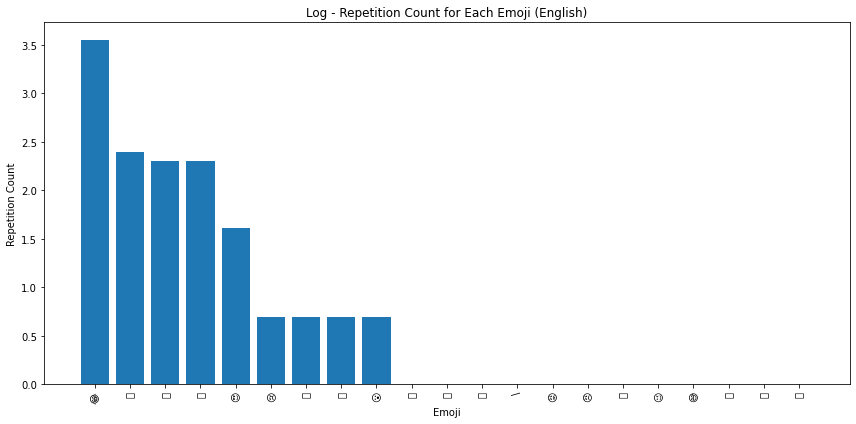

Index(['😂', '👏', '🤣', '🔥', '😍', '😢', '👎', '🙌', '😮'], dtype='object', name='emoji')

In [14]:
en_df_repetition_count = en_emoji_repetition_count.sort_values(ascending=False)
en_emojis2 = en_df_repetition_count.index
en_repetition_count = en_df_repetition_count.values
log_en_repetition_count = np.log(en_repetition_count)

plt.figure(figsize=(12, 6))
plt.bar(en_emojis2, log_en_repetition_count)
plt.xlabel('Emoji')
plt.ylabel('Repetition Count')
plt.title('Log - Repetition Count for Each Emoji (English)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
en_emojis2[:9]

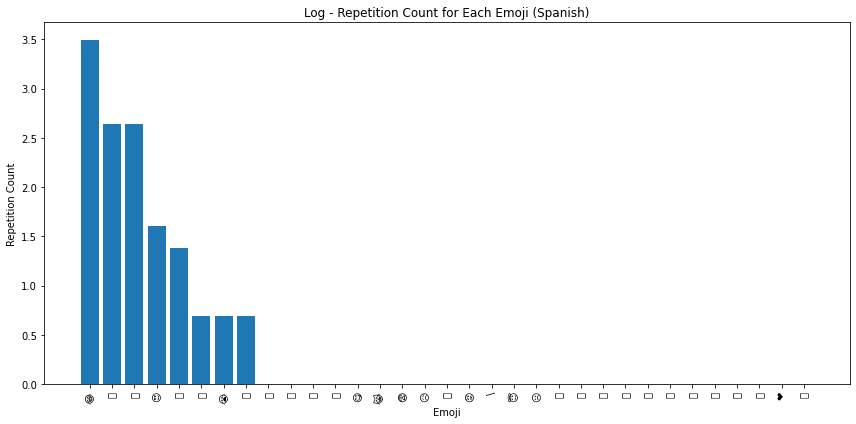

Index(['😂', '👏', '🔥', '😍', '🙌', '🤣', '😭', '💔'], dtype='object', name='emoji')

In [15]:
es_df_repetition_count = es_emoji_repetition_count.sort_values(ascending=False)
es_emojis2 = es_df_repetition_count.index
es_repetition_count = es_df_repetition_count.values
log_es_repetition_count = np.log(es_repetition_count)

plt.figure(figsize=(12, 6))
plt.bar(es_emojis2, log_es_repetition_count)
plt.xlabel('Emoji')
plt.ylabel('Repetition Count')
plt.title('Log - Repetition Count for Each Emoji (Spanish)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
es_emojis2[:8]

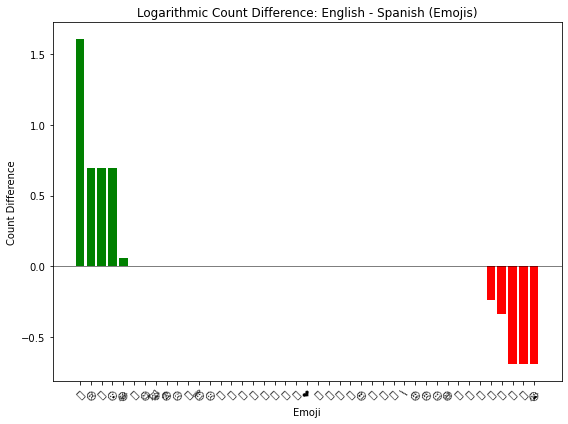

2     🤣
5     😢
6     👎
8     😮
0     😂
33    💰
26    😋
27    😹
28    😨
29    😥
30    🥳
31    😇
32    ☹
36    💚
34    💪
35    💜
24    🤔
37    💙
38    👋
39    🐐
40    ⭐
41    ❤
25    🤬
42    🥺
23    🤩
15    🌹
4     😍
9     🥰
10    🙏
11    🙄
12    \
13    😡
14    😠
16    😉
17    😅
18    💯
19    💀
20    🥱
1     👏
3     🔥
22    💔
7     🙌
21    😭
Name: Emoji, dtype: object

In [16]:
# Get the unique union of emojis from both data frames
emojis_union2 = sorted(set(en_emojis2) | set(es_emojis2))

# Create DataFrames from the data
en_df2 = pd.DataFrame({'Emoji': en_df_repetition_count.index, 'Repetition Count (English)': np.log(en_df_repetition_count.values)})
es_df2 = pd.DataFrame({'Emoji': es_df_repetition_count.index, 'Repetition Count (Spanish)': np.log(es_df_repetition_count.values)})

# Merge DataFrames on 'Emoji' to ensure data alignment
merged_df2 = pd.merge(en_df2, es_df2, on='Emoji', how='outer')
merged_df2 = merged_df2.fillna(0) 

merged_df2['Count Difference'] = merged_df2['Repetition Count (English)'].sub(merged_df2['Repetition Count (Spanish)'], axis = 0) 
merged_df2 = merged_df2.sort_values(by='Count Difference', ascending=False)
# merged_df2 = merged_df2[merged_df2['Count Difference'] != 0]


# Create a bar chart on Count Difference
plt.figure(figsize=(8, 6))
plt.bar(merged_df2['Emoji'], merged_df2['Count Difference'], color=['g' if x >= 0 else 'r' for x in merged_df2['Count Difference']])
plt.xlabel('Emoji')
plt.ylabel('Count Difference')
plt.title("Logarithmic Count Difference: English - Spanish (Emojis)")
plt.axhline(0, color='black', linewidth=0.5)  # Add a horizontal line at y=0
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()
plt.show()
merged_df2['Emoji']


## Results:
### Top 5 in English: 😂👏🤣🔥😍
### Top 5 in Spanish: 😂👏🔥😍🙌
### 😂👏🔥😍 are repeated a lot in both languages
###   🤣😢👎😮 are repeated more in English, while 🔥💔🙌😭😂 are repeated more in Spanish
